# Chocolate Ratings Analysis

This is a quick and dirty analysis of a chocolate dataset. I hope y'all like it!!

# Contents

- [Imports](#Imports)
- [How does the Data Look?](#How-does-the-Data-Look?)
- [Missing Data](#Missing-Data)
- [Data Processing](#Data-Processing)
- [EDA](#EDA.)
- [More EDA](#More-EDA)
  

# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [12]:
ls

adult_data/
adverse-food-events/
amazon-fine-food-reviews/
creditcard.csv*
data-science-for-good-kiva-crowdfunding/
diabetes.csv*
flavors_of_cacao.csv*
flipkart_com-ecommerce_sample.csv*
iris_folder/
kickstarter-projects/
powerlifting-database/
wine-reviews/
zecon/


In [13]:
cacao = pd.read_csv('flavors_of_cacao.csv')

# How does the Data Look?

In [14]:
cacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


Only 1794 rows and 9 columns. Not a very large dataset.

In [15]:
cacao.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


The review spans from 2006 to 2017. A score of 1 is the lowest and 5 is the highest. Average rating is 3.2

In [16]:
cacao.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


Two things. 'Cocoa Percent' doesn't seem to be an int or float type and 'Bean Type' seems to be missing some data.

# Missing Data

In [977]:
cacao.isnull().head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


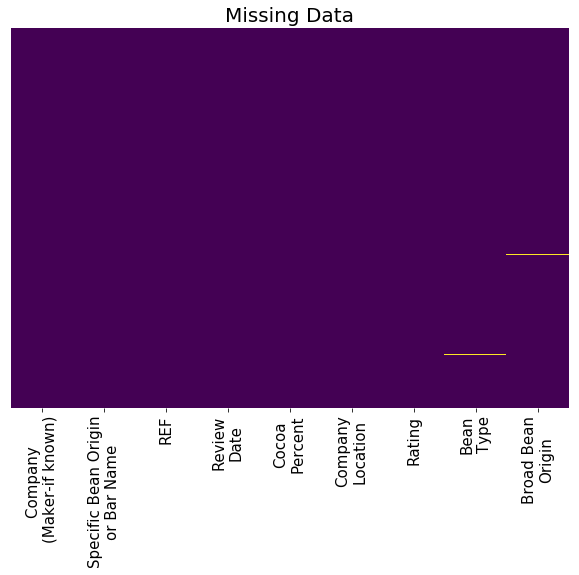

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(cacao.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.title('Missing Data',fontsize=20)
plt.xticks(fontsize=15)
plt.show()

In [979]:
cacao['Bean\nType'][0]

'\xa0'

'\xa0' is a 'non-breaking-space'

In [980]:
len(cacao[cacao['Bean\nType']=='\xa0']) / len(cacao['Bean\nType'])

0.49415041782729807

Nearly 50% of the info on the Bean Type column has no value.

In [981]:
cacao['Bean\nType'].value_counts().head(10)

                        887
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Blend                    41
Criollo, Trinitario      39
Forastero (Arriba)       37
Criollo (Porcelana)      10
Trinitario, Criollo       9
Name: Bean\nType, dtype: int64

Most bean types are a combintion of one of the three most popular beans.

# Data Processing

In [21]:
type(cacao['Cocoa\nPercent'][0])

str

In [22]:
cacao['Cocoa\nPercent'] = cacao['Cocoa\nPercent'].apply(lambda x: float(x.split('%')[0]))

In [23]:
type(cacao['Cocoa\nPercent'][0])

numpy.float64

# EDA. 

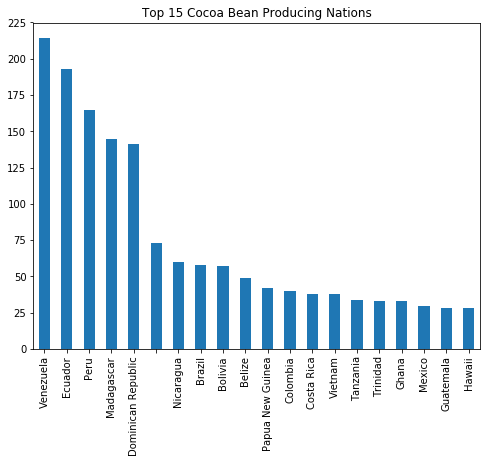

Top 15 Cocoa Bean Producing Nations

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Costa Rica             38
Vietnam                38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30
Guatemala              28
Hawaii                 28
Name: Broad Bean\nOrigin, dtype: int64


In [982]:
plt.figure(figsize=(8,6))
cacao['Broad Bean\nOrigin'].value_counts().head(20).plot.bar()
plt.title('Top 15 Cocoa Bean Producing Nations')
plt.show()
print('Top 15 Cocoa Bean Producing Nations\n')
print(cacao['Broad Bean\nOrigin'].value_counts().head(20))

Aside from Madagascar, a huge amount of cocoa beans come from Latin America.
A good portion of bars reviewed source from a combination of nations.

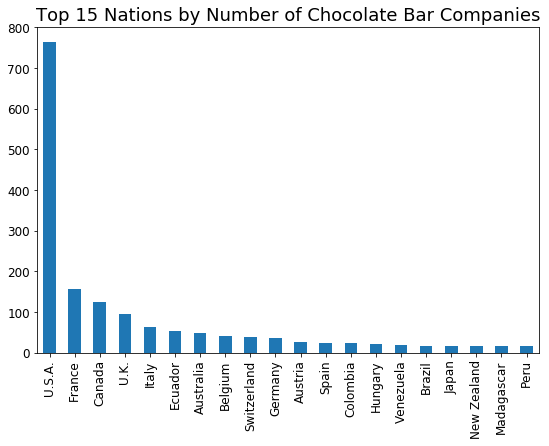

Top 15 Nations by Number of Chocolate Bar Companies

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Austria         26
Spain           25
Colombia        23
Hungary         22
Venezuela       20
Brazil          17
Japan           17
New Zealand     17
Madagascar      17
Peru            17
Name: Company\nLocation, dtype: int64


In [77]:
plt.figure(figsize=(9,6))
cacao['Company\nLocation'].value_counts().head(20).plot.bar()
plt.title('Top 15 Nations by Number of Chocolate Bar Companies',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Top 15 Nations by Number of Chocolate Bar Companies\n')
print(cacao['Company\nLocation'].value_counts().head(20))

U.S.A. is by far the country with the most chocolate producers. Most other chocolate producing nations are either European, North American or Australian.

Brazil, Peru, Ecuador, Colombia and Venezuela are the only countries that both produce chocolate bars and cocoa beans by a good margin. Ecuador really stands out.

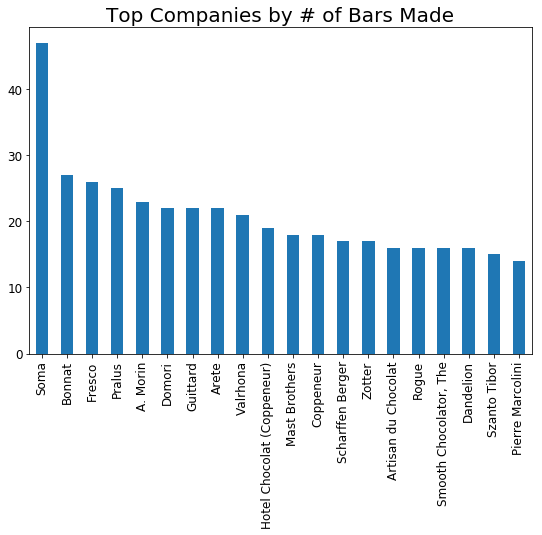

Top Companies by # of Bars Made

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Domori                        22
Guittard                      22
Arete                         22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Mast Brothers                 18
Coppeneur                     18
Scharffen Berger              17
Zotter                        17
Artisan du Chocolat           16
Rogue                         16
Smooth Chocolator, The        16
Dandelion                     16
Szanto Tibor                  15
Pierre Marcolini              14
Name: Company \n(Maker-if known), dtype: int64


In [80]:
plt.figure(figsize=(9,6))
cacao['Company\xa0\n(Maker-if known)'].value_counts().head(20).plot.bar()
plt.title('Top Companies by # of Bars Made',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
print('Top Companies by # of Bars Made\n')
print(cacao['Company\xa0\n(Maker-if known)'].value_counts().head(20))

The Canadian company Soma really stands out as a producer that has been rated many times.

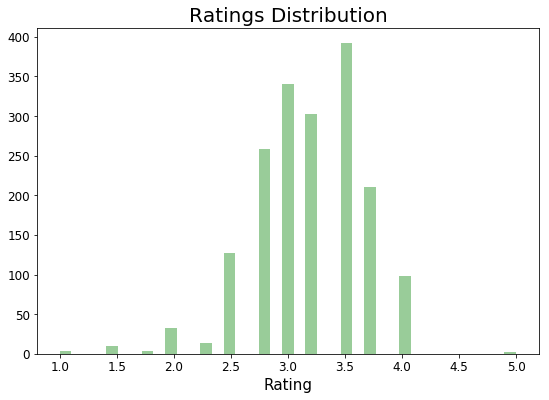

3.50    392
3.00    341
3.25    303
2.75    259
3.75    210
2.50    127
4.00     98
2.00     32
2.25     14
1.50     10
1.00      4
1.75      3
5.00      2
Name: Rating, dtype: int64


In [84]:
plt.figure(figsize=(9,6))
sns.distplot(cacao['Rating'],kde=False,color='green')
plt.title('Ratings Distribution',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Rating',fontsize=15)
plt.show()
print(cacao['Rating'].value_counts())

Most chocolate bars rank between 2.5 and 3.75. Only 2 bars rank above 4. Only 17 bars below 2.

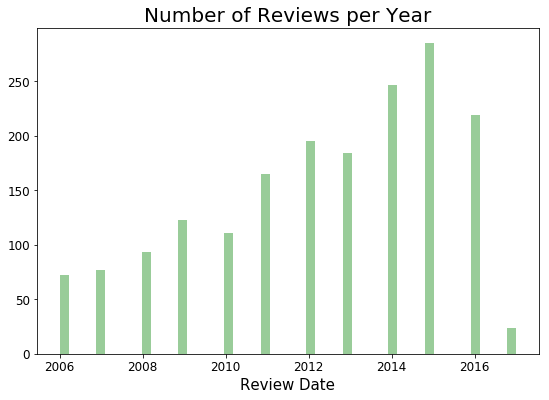

In [86]:
plt.figure(figsize=(9,6))
sns.distplot(cacao['Review\nDate'],bins=50,kde=False,color='green')
plt.title('Number of Reviews per Year',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Review Date',fontsize=15)
plt.show()

The number of reviews increases until 2016, and sharply drops in 2017. 

# More EDA

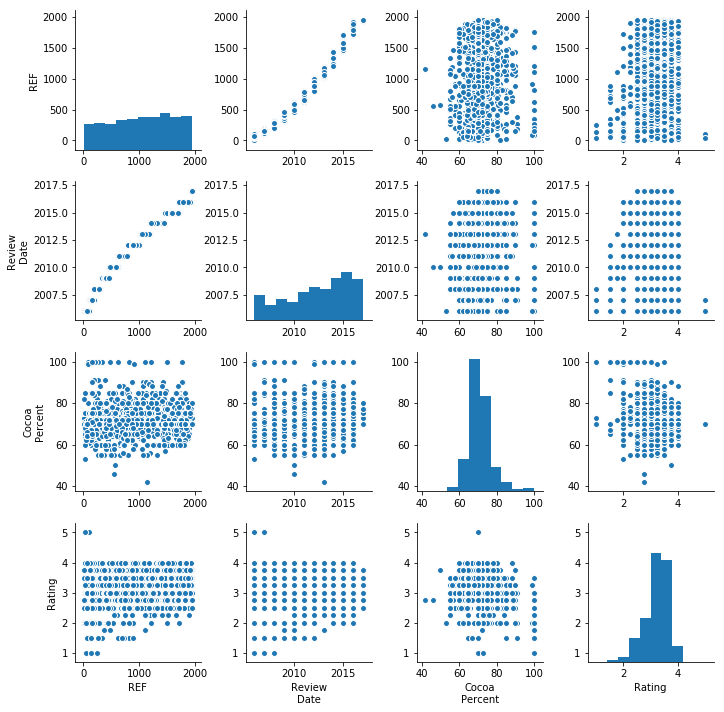

In [24]:
sns.pairplot(cacao)

In this analysis, the Rating column will be the label. The two other columns that can be used to study Ratings would be the Review Date column and the Cocoa Percent column. 

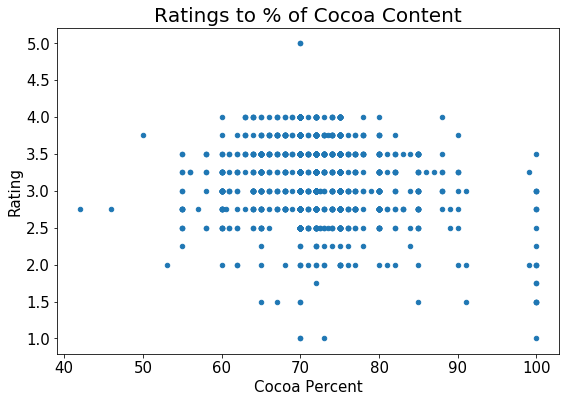

Cocoa % to Quantity 
------------
70.0    672
75.0    222
72.0    189
65.0     78
80.0     72
74.0     50
68.0     47
60.0     43
73.0     40
85.0     36
Name: Cocoa\nPercent, dtype: int64


In [74]:
cacao.plot.scatter(x='Cocoa\nPercent',y='Rating',figsize=(9,6))
plt.title('Ratings to % of Cocoa Content',fontsize=20)
plt.xlabel('Cocoa Percent',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Cocoa % to Quantity ')
print('------------')
print(cacao['Cocoa\nPercent'].value_counts().head(10))

Chocolates with higher ratings contain between 60% - 80% cocoa.

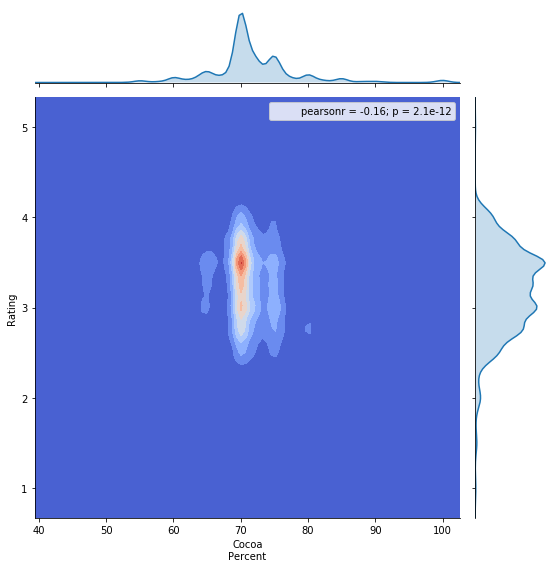

In [27]:
sns.jointplot(x='Cocoa\nPercent',y='Rating',data=cacao,size=8,kind='kde',cmap='coolwarm')

A huge portion of chocolates reviewed contain around 70% cocoa and rank between 2.5 to 4.

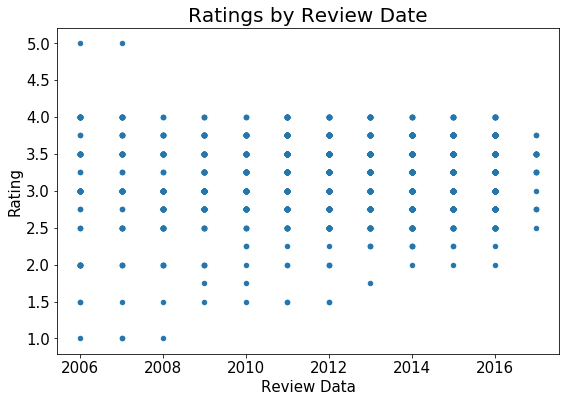

Year and number of ratings that year.

2015    285
2014    247
2016    219
2012    195
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
Name: Review\nDate, dtype: int64


In [71]:
cacao.plot.scatter(x='Review\nDate',y='Rating',figsize=(9,6))
plt.title('Ratings by Review Date',fontsize=20)
plt.xlabel('Review Data',fontsize=15)
plt.ylabel('Rating',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print('Year and number of ratings that year.\n')
print(cacao['Review\nDate'].value_counts().head(10))

No ratings above 4 after 2007 and no ratings below 2 after 2014.
Ratings vary less as the review progresses in time.

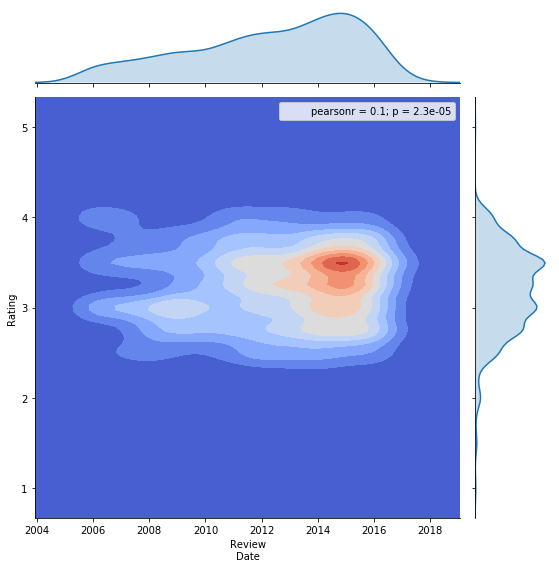

In [29]:
sns.jointplot(x='Review\nDate',y='Rating',data=cacao,size=8,kind='kde',cmap='coolwarm')

Ranking scores become less diverse as time progresses. Many of the reviews are between 2012 and 2017.

In [30]:
cacao[cacao['Rating']==5]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
78,Amedei,Chuao,111,2007,70.0,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.0,Blend,


Only 2 bars ranked #5. Both were Italian, both were from Amedei and both were 70% cocoa.

In [31]:
cacao[cacao['Rating']==1]

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
326,Callebaut,Baking,141,2007,70.0,Belgium,1.0,,Ecuador
437,Claudio Corallo,Principe,252,2008,100.0,Sao Tome,1.0,Forastero,Sao Tome & Principe
465,Cote d' Or (Kraft),Sensations Intense,48,2006,70.0,Belgium,1.0,,
1175,Neuhaus (Callebaut),Dark,135,2007,73.0,Belgium,1.0,,


3 of the 4 worst chocolates came from Belgium. No chocolate with a rating of 1 came after 2008.

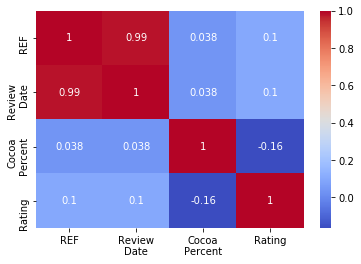

In [32]:
sns.heatmap(cacao.corr(),cmap='coolwarm',annot=True)

There doesn't seem to be any correlation between review date, cocoa percent and rating.

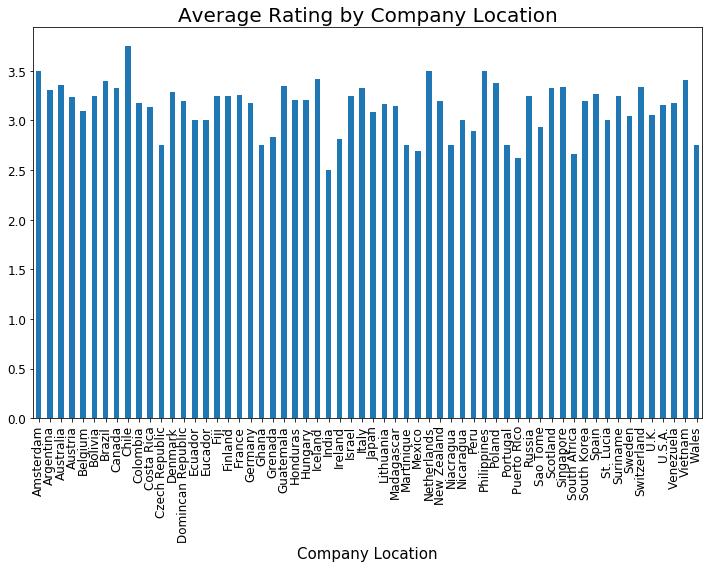

Best Average Ratings by Company Location

Company\nLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Rating, dtype: float64


In [55]:
koko = cacao.groupby('Company\nLocation').mean()
plt.figure(figsize=(10,8))
koko['Rating'].plot.bar()
plt.title('Average Rating by Company Location',fontsize=20)
plt.xlabel('Company Location',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
print('Best Average Ratings by Company Location\n')
print(koko['Rating'].sort_values(ascending=False).head(10))

In [48]:
print('Chile has ' + str(len(cacao[cacao['Company\nLocation']=='Chile'])) +' chocolate companies.')
print('The Netherlands have ' + str(len((cacao[cacao['Company\nLocation']=='Amsterdam'] + cacao[cacao['Company\nLocation']=='Netherlands']))) + ' chocolate companies.')
print('The Philippines have ' + str(len(cacao[cacao['Company\nLocation']=='Philippines'])) +' chocolate companies.')

Chile has 2 chocolate companies.
The Netherlands have 8 chocolate companies.
The Philippines have 1 chocolate companies.


Do not be fooled! The Dutch have more chocolates rated than the other 2 nations.
No surprise the Dutch are good chocolate makers! View the link below.

https://en.wikipedia.org/wiki/Dutch_process_chocolate

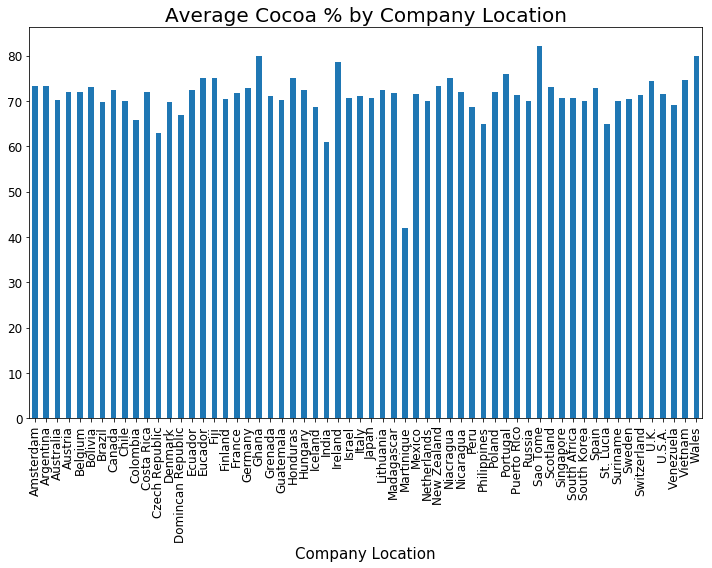

Highest Average Cocoa % by company Location

Company\nLocation
Sao Tome     82.125000
Wales        80.000000
Ghana        80.000000
Ireland      78.500000
Portugal     76.000000
Eucador      75.000000
Fiji         75.000000
Honduras     75.000000
Niacragua    75.000000
Vietnam      74.545455
Name: Cocoa\nPercent, dtype: float64


Lowest Average Cocoa % by company Location

Company\nLocation
Venezuela            69.175000
Peru                 68.764706
Iceland              68.666667
Domincan Republic    67.000000
Colombia             65.739130
Philippines          65.000000
St. Lucia            65.000000
Czech Republic       63.000000
India                61.000000
Martinique           42.000000
Name: Cocoa\nPercent, dtype: float64


In [53]:
plt.figure(figsize=(10,8))
koko['Cocoa\nPercent'].plot.bar()
plt.title('Average Cocoa % by Company Location',fontsize=20)
plt.xlabel('Company Location',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
print('Highest Average Cocoa % by company Location\n')
print(koko['Cocoa\nPercent'].sort_values(ascending=False).head(10))
print('\n')
print('Lowest Average Cocoa % by company Location\n')
print(koko['Cocoa\nPercent'].sort_values(ascending=False).tail(10))

Where are Eucador, The Domincan Republic and Niacragua??? The dataset seems to have spelling errors. Many of the extremes seem to be single instances. Sao Tome and Ireland both have 4 instances.

In [35]:
print('Top Rated by Location of Bean.\n')
print(cacao.groupby('Broad Bean\nOrigin')['Rating'].mean().sort_values(ascending=False).head(10))
print('\n')
print('Bottom Rated by Location of Bean.\n')
print(cacao.groupby('Broad Bean\nOrigin')['Rating'].mean().sort_values(ascending=False).tail(10))

Top Rated by Location of Bean.

Broad Bean\nOrigin
Peru, Dom. Rep                  4.00
Guat., D.R., Peru, Mad., PNG    4.00
Gre., PNG, Haw., Haiti, Mad     4.00
Venezuela, Java                 4.00
Dom. Rep., Madagascar           4.00
Ven, Bolivia, D.R.              4.00
Venez,Africa,Brasil,Peru,Mex    3.75
DR, Ecuador, Peru               3.75
Ven.,Ecu.,Peru,Nic.             3.75
Peru, Belize                    3.75
Name: Rating, dtype: float64


Bottom Rated by Location of Bean.

Broad Bean\nOrigin
Venezuela, Dom. Rep.         2.750000
Trinidad-Tobago              2.750000
Africa, Carribean, C. Am.    2.750000
Martinique                   2.750000
Cost Rica, Ven               2.750000
West Africa                  2.583333
Puerto Rico                  2.500000
Venezuela, Trinidad          2.500000
Peru, Madagascar             2.500000
Ghana & Madagascar           2.000000
Name: Rating, dtype: float64


Both top  and bottom rated chocolates source their beans from a variety of places (with a few exceptions).

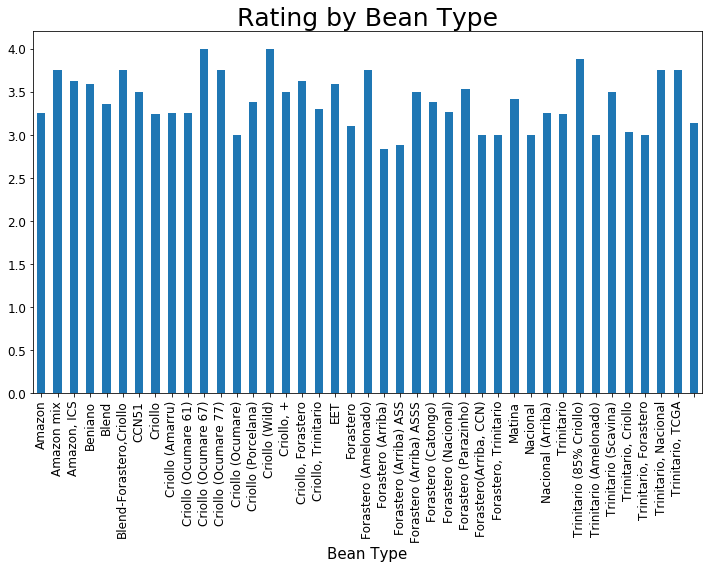

Most Common Bean Type

                          887
Trinitario                419
Criollo                   153
Forastero                  87
Forastero (Nacional)       52
Blend                      41
Criollo, Trinitario        39
Forastero (Arriba)         37
Criollo (Porcelana)        10
Trinitario, Criollo         9
Forastero (Parazinho)       8
Forastero (Arriba) ASS      6
Matina                      3
EET                         3
Nacional (Arriba)           3
Name: Bean\nType, dtype: int64


Top Rated Beans by Bean Type

Bean\nType
Criollo (Ocumare 67)        4.000000
Criollo (Wild)              4.000000
Trinitario (85% Criollo)    3.875000
Forastero (Amelonado)       3.750000
Trinitario, Nacional        3.750000
Amazon mix                  3.750000
Blend-Forastero,Criollo     3.750000
Trinitario, TCGA            3.750000
Criollo (Ocumare 77)        3.750000
Amazon, ICS                 3.625000
Criollo, Forastero          3.625000
Beniano                     3.583333
EET      

In [54]:
plt.figure(figsize=(10,8))
bean_type = cacao.groupby('Bean\nType')
bean_type.mean()['Rating'].plot.bar()
plt.title('Rating by Bean Type',fontsize=25)
plt.xlabel('Bean Type',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
print('Most Common Bean Type\n')
print(cacao['Bean\nType'].value_counts().head(15))
print('\n')
print('Top Rated Beans by Bean Type\n')
print(cacao.groupby(['Bean\nType'])['Rating'].mean().sort_values(ascending=False).head(15))
print('\n')
print('Bottom Rated Beans by Bean Type\n')
print(cacao.groupby(['Bean\nType'])['Rating'].mean().sort_values(ascending=False).tail(15))

A lot of missing data for this column. Notice the most common Bean Types (Forastero, Criollo, Trinitario) rank somewhere in the middle.

# Feed back is appreciated!! Thank you!